In [11]:
from skimage.feature import hog
from skimage import io, color
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image

# Dosyanın yolunu belirtin (Drive'da yer alan dosyanın yolunu belirtmelisiniz)
dosya_yolu = '/content/drive/My Drive/logo.jpg'

import zipfile
import os

# ZIP dosyasının yolunu belirtin (Drive'da yer alan ZIP dosyasının yolunu belirtmelisiniz)
zip_dosya_yolu = '/content/drive/My Drive/logos.zip'

# ZIP dosyasını açın
with zipfile.ZipFile(zip_dosya_yolu, 'r') as zip_ref:
    # ZIP içeriğini bir dizine çıkarın (örneğin, 'icindeki_dosyalar' dizinine çıkarın)
    zip_ref.extractall('/content/icindeki_dosyalar')

# ZIP dosyasını açtıktan sonra içeriği görebilirsiniz
dosya_listesi = os.listdir('/content/icindeki_dosyalar')
print("ZIP Dosyası İçeriği:")
print(dosya_listesi)


Mounted at /content/drive
ZIP Dosyası İçeriği:
['new_train_data']


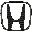

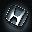

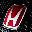

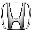

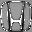

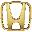

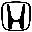

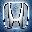

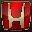

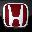

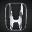

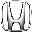

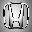

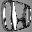

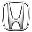

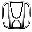

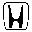

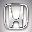

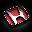

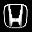

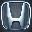

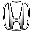

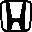

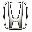

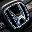

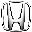

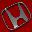

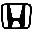

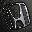

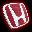

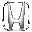

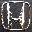

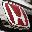

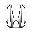

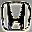

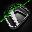

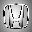

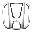

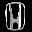

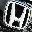

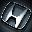

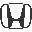

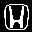

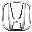

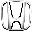

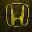

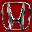

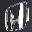

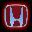

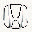

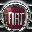

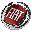

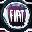

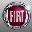

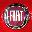

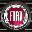

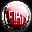

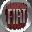

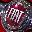

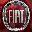

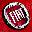

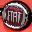

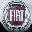

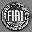

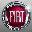

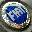

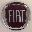

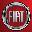

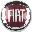

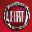

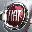

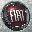

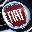

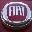

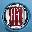

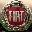

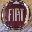

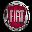

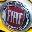

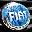

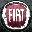

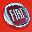

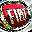

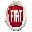

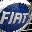

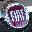

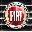

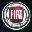

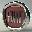

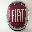

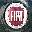

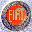

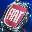

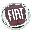

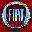

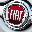

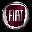

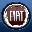

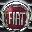

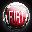

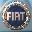

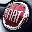

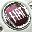

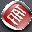

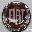

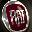

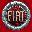

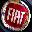

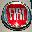

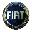

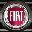

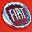

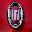

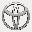

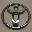

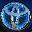

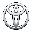

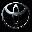

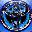

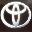

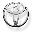

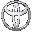

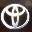

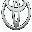

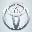

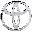

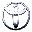

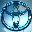

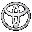

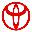

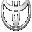

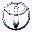

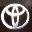

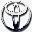

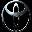

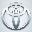

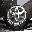

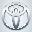

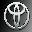

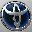

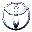

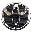

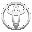

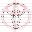

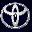

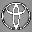

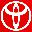

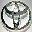

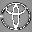

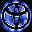

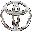

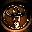

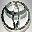

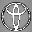

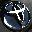

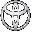

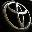

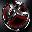

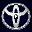

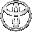

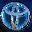

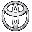

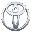

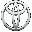

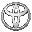

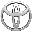

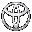

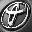

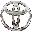

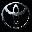

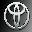

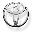

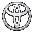

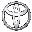

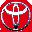

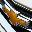

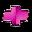

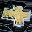

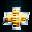

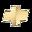

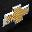

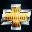

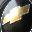

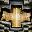

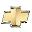

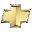

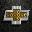

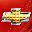

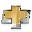

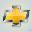

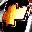

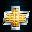

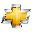

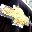

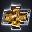

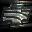

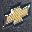

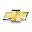

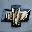

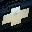

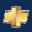

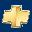

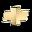

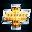

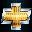

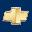

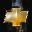

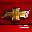

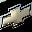

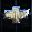

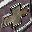

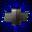

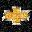

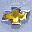

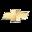

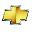

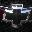

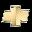

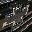

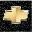

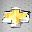

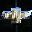

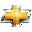

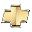

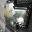

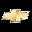

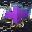

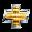

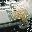

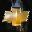

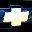

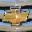

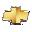

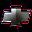

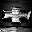

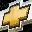

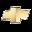

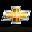

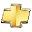

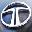

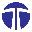

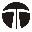

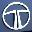

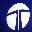

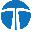

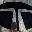

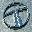

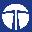

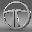

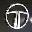

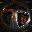

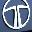

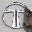

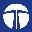

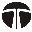

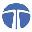

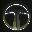

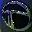

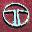

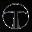

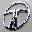

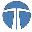

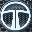

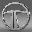

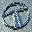

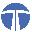

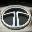

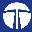

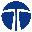

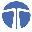

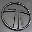

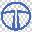

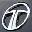

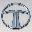

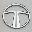

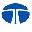

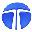

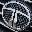

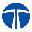

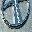

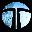

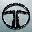

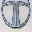

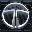

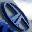

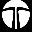

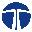

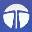

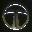

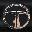

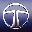

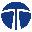

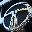

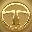

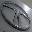

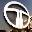

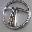

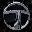

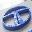

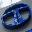

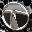

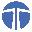

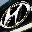

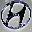

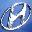

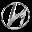

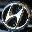

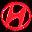

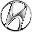

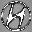

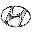

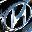

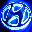

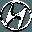

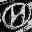

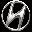

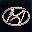

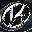

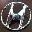

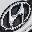

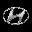

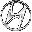

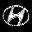

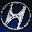

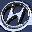

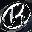

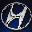

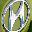

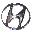

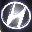

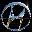

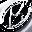

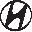

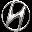

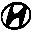

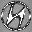

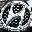

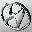

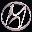

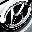

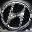

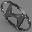

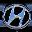

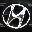

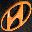

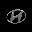

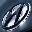

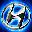

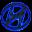

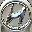

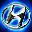

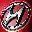

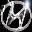

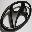

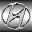

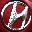

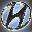

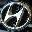

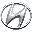

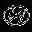

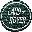

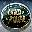

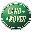

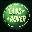

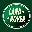

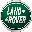

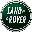

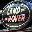

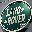

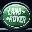

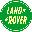

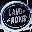

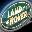

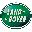

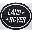

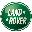

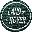

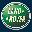

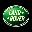

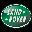

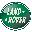

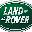

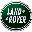

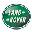

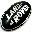

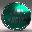

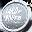

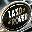

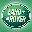

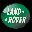

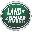

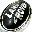

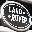

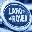

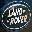

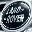

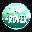

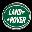

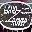

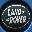

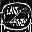

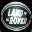

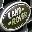

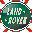

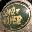

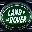

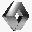

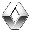

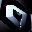

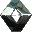

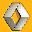

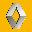

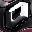

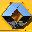

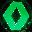

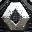

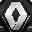

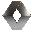

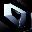

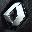

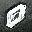

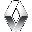

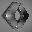

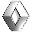

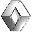

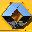

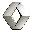

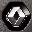

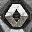

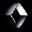

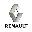

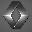

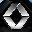

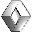

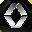

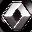

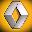

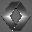

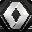

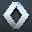

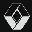

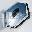

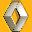

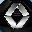

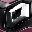

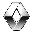

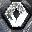

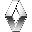

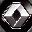

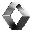

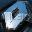

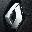

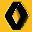

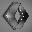

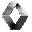

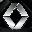

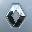

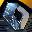

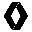

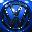

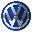

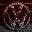

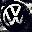

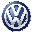

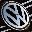

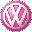

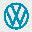

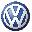

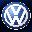

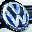

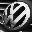

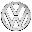

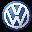

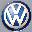

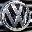

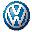

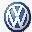

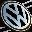

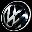

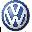

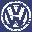

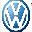

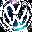

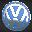

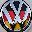

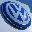

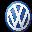

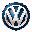

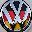

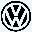

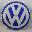

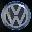

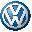

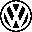

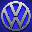

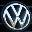

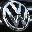

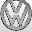

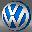

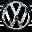

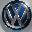

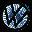

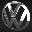

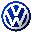

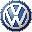

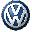

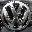

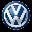

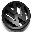

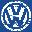

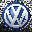

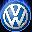

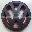

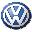

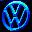

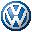

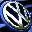

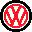

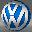

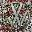

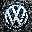

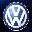

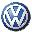

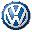

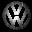

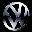

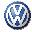

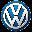

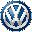

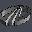

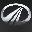

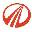

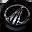

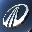

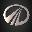

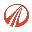

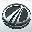

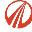

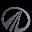

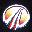

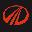

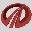

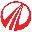

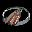

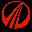

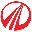

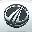

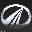

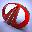

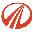

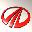

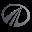

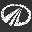

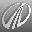

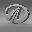

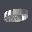

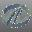

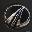

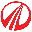

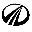

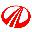

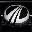

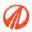

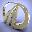

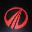

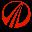

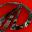

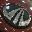

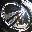

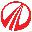

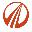

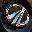

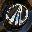

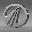

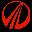

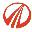

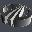

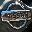

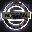

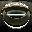

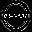

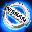

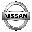

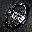

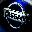

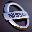

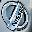

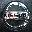

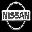

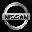

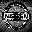

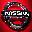

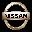

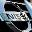

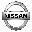

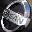

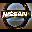

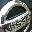

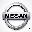

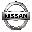

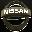

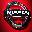

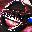

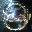

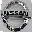

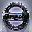

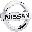

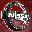

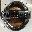

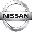

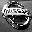

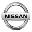

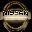

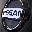

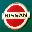

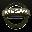

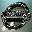

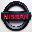

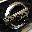

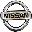

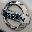

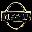

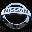

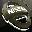

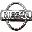

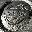

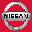

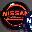

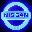

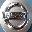

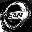

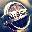

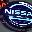

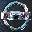

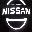

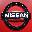

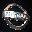

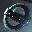

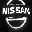

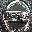

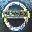

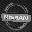

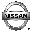

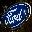

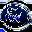

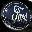

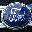

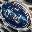

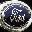

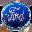

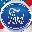

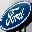

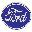

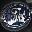

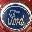

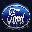

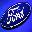

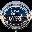

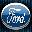

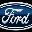

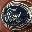

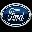

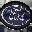

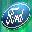

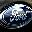

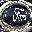

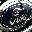

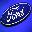

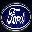

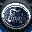

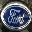

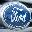

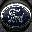

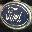

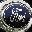

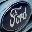

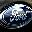

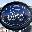

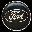

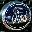

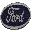

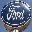

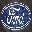

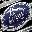

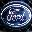

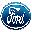

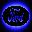

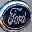

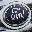

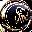

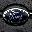

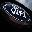

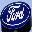

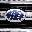

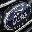

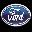

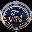

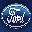

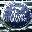

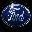

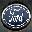

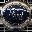

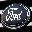

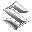

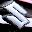

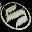

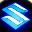

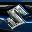

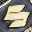

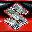

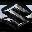

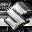

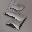

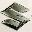

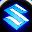

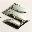

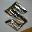

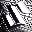

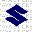

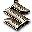

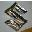

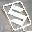

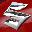

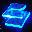

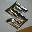

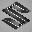

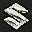

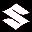

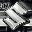

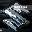

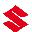

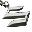

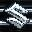

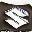

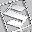

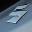

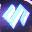

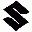

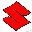

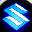

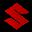

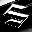

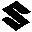

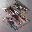

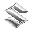

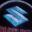

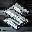

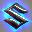

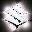

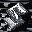

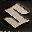

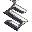

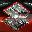

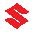

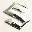

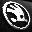

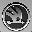

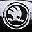

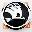

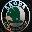

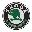

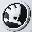

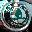

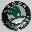

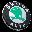

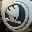

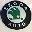

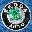

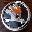

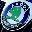

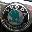

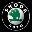

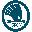

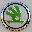

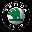

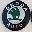

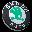

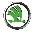

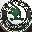

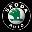

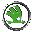

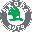

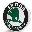

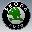

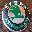

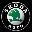

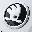

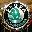

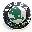

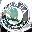

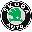

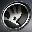

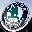

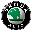

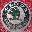

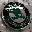

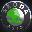

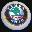

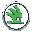

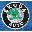

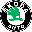

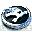

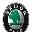

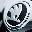

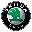

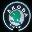

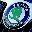

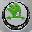

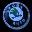

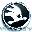

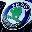

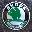

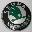

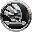

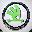

In [78]:
import os
from PIL import Image
from IPython.display import display
import numpy as np

ana_dizin = "/content/icindeki_dosyalar/new_train_data/"
dosyalar = os.listdir(ana_dizin)

resimler = []  # Resimleri depolamak için boş bir liste
etiketler = []  # Etiketleri depolamak için boş bir liste

for dosya_adi in dosyalar:
    dosya_yolu = os.path.join(ana_dizin, dosya_adi)
    # Klasör kontrolü yapın
    if os.path.isdir(dosya_yolu):
        resimler_klasor = [dosya for dosya in os.listdir(dosya_yolu) if dosya.lower().endswith(('.jpg'))]
        # Klasör içindeki resim dosyalarını işlemek için
        for resim_adi in resimler_klasor:
            resim_yolu = os.path.join(dosya_yolu, resim_adi)
            with Image.open(resim_yolu) as img:
                img = img.convert("RGB")
                display(img)
                img = np.array(img)/ 255.0
                # Resim dosyasını işleme kodlarını burada yazabilirsiniz


                # Resmi ve etiketi listelere ekleyin
                resimler.append(img)
                etiketler.append(dosya_adi)  # Veya uygun bir şekilde etiketi belirleyin


# resimler listesi içinde resimler, etiketler listesi içinde ise ilgili etiketler bulunacak



In [93]:
resimler_np = np.array(resimler)
etiketler_np = np.array(etiketler)
from sklearn.model_selection import train_test_split

# Veri setini eğitim ve test veri setlerine bölebilirsiniz
X_train, X_test, y_train, y_test = train_test_split(resimler, etiketler, test_size=0.2, random_state=42)

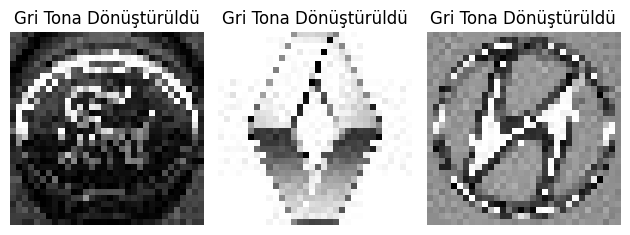

In [94]:
from skimage.color import rgb2gray

# Eğitim verilerini gri tona dönüştürme
X_train = [rgb2gray(resim) for resim in X_train]

# Test verilerini gri tona dönüştürme
X_test = [rgb2gray(resim) for resim in X_test]

for i in range(3):
    plt.subplot(2, 3, i + 4)
    plt.imshow(X_train[i], cmap=plt.cm.gray)  # Gri tonlamalı resim
    plt.title("Gri Tona Dönüştürüldü")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [95]:
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# HOG parametreleri
orientations = 9  # HOG özelliklerinin yön sayısı
pixels_per_cell = (8, 8)  # Hücre başına piksel sayısı
cells_per_block = (2, 2)  # Blok başına hücre sayısı

# HOG özelliklerini çıkar
hog_features = []
for resim in X_train:
    # HOG özelliklerini çıkar
    features = hog(resim, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=False)
    hog_features.append(features)

# HOG özelliklerini içeren eğitim verisi
X_train_hog = np.array(hog_features)

# SVM sınıflandırıcı oluştur
svm_model = LinearSVC()

# SVM sınıflandırıcıyı eğit
svm_model.fit(X_train_hog, y_train)

# Test verilerinin HOG özelliklerini çıkar
hog_features_test = []
for resim in X_test:
    features = hog(resim, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=False)
    hog_features_test.append(features)

# HOG özelliklerini içeren test verisi
X_test_hog = np.array(hog_features_test)

# Modeli değerlendirme
tahminler = svm_model.predict(X_test_hog)
dogruluk = accuracy_score(y_test, tahminler)

print("Model Doğruluğu:", dogruluk)


Model Doğruluğu: 0.803680981595092


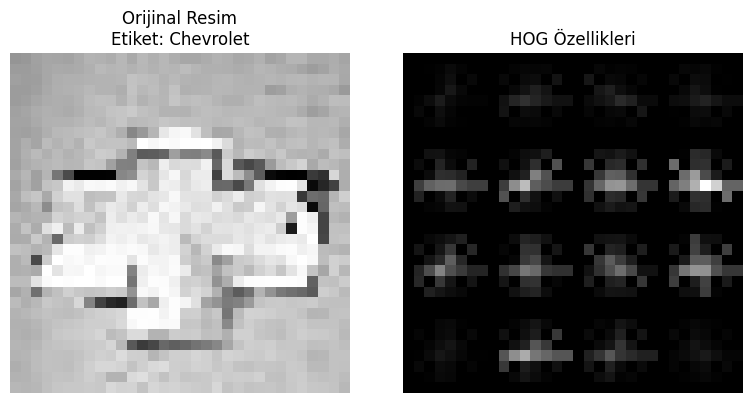

In [100]:
import matplotlib.pyplot as plt
from skimage.feature import hog

# Örnek bir resim ve etiketi seçme
ornek_resim = X_train[80]
ornek_etiket = y_train[80]

# Orijinal resmi gösterme
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(ornek_resim, cmap=plt.cm.gray)
plt.title("Orijinal Resim\nEtiket: {}".format(ornek_etiket))
plt.axis("off")

# HOG özelliklerini çıkar
hog_features, hog_image = hog(ornek_resim, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True)

# HOG özelliklerini görselleştirme
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title("HOG Özellikleri")
plt.axis("off")

plt.tight_layout()
plt.show()

